# Blending Two Images using OpenCV

In [1]:
import cv2

# Load the image
image = cv2.imread('image2.jpg')

# Calculate the new height after cutting off the bottom 10%
height, width, _ = image.shape
new_height = int(height * 0.75)

# Crop the image
cropped_image = image[0:new_height, :]
cv2.imwrite("croped_image2.jpg",cropped_image)

# Display the cropped image
# cv2.imshow('Cropped Image', cropped_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

1124
1000


Text(0.5, 1.0, 'Final Image')

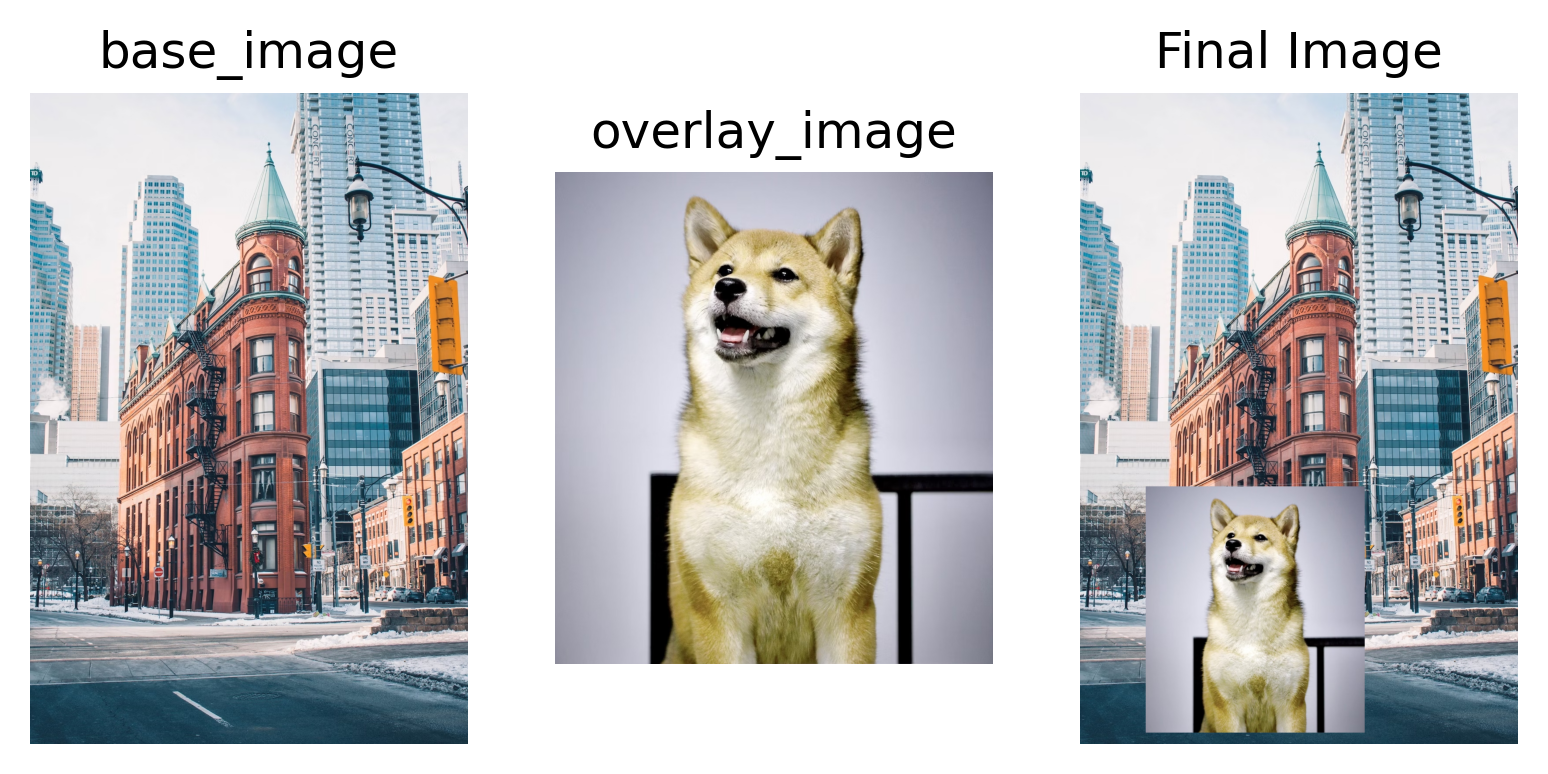

In [2]:
import cv2
import matplotlib.pyplot as plt

# Load the base image and overlay image
base_image = cv2.imread('image1.jpg')
overlay_image = cv2.imread('croped_image2.jpg', cv2.IMREAD_UNCHANGED)  # Load with transparency if needed

# Define the position to place the overlay image (bottom-center)
overlay_height, overlay_width = overlay_image.shape[:2]
print(overlay_height)
print(overlay_width)
position_x = 150
position_y = 900

# Resize the overlay image to a smaller size
new_overlay_width = int(overlay_width * 0.5)
new_overlay_height = int(overlay_height * 0.5)
resized_overlay = cv2.resize(overlay_image, (new_overlay_width, new_overlay_height))

# Create a mask to handle transparency if the overlay image has an alpha channel
if overlay_image.shape[2] == 4:
    overlay_mask = resized_overlay[:, :, 3] / 255.0
    base_mask = 1.0 - overlay_mask

    # Blend the images using alpha blending
    for c in range(0, 3):
        base_image[position_y : position_y + new_overlay_height, position_x : position_x + new_overlay_width, c] = (
            base_mask * base_image[position_y : position_y + new_overlay_height, position_x : position_x + new_overlay_width, c]
            + overlay_mask * resized_overlay[:, :, c]
        )
else:
    # Directly overlay the images
    base_image[position_y : position_y + new_overlay_height, position_x : position_x + new_overlay_width] = resized_overlay

# Display the result
cv2.imwrite("base_image.jpg",base_image)
input_image = cv2.imread('image1.jpg')

fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("base_image")

fig.add_subplot(1,3,2)
plt.imshow(cv2.cvtColor(overlay_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("overlay_image")

fig.add_subplot(1,3,3)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Final Image")
